# THE SPARK FOUNDATION (GRIPFEB21)

# DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP

**Author: PUJA ROY**

# TASK 5: Exploratory Data Analysis - Sports

# Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

**As a sports analysts, find out the most successful teams, players and factors contributing to win or loss of a team.**

# Importing all the necessary libraries

In [19]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the dataset

In [11]:
matches = pd.read_csv('matches.csv',encoding='ISO-8859-1')
print("Data imported successfully")

Data imported successfully


In [12]:
#printing head( first few rows) of the dataset 
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
# check for null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
# dropping the umpire columns to get rid of null values
matches = matches.drop(['umpire3'],axis=1)

In [15]:
#the total no of rows and columns
print('The Total no of rows and columns in matches dataset is', matches.shape)

The Total no of rows and columns in matches dataset is (756, 17)


**Total matches played = 756**

In [16]:
len(matches['season'].unique())

12

**Total seasons played = 12**

In [17]:
pd.concat([matches['team1'],matches['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**Total Teams = 15**

# Winning Teams

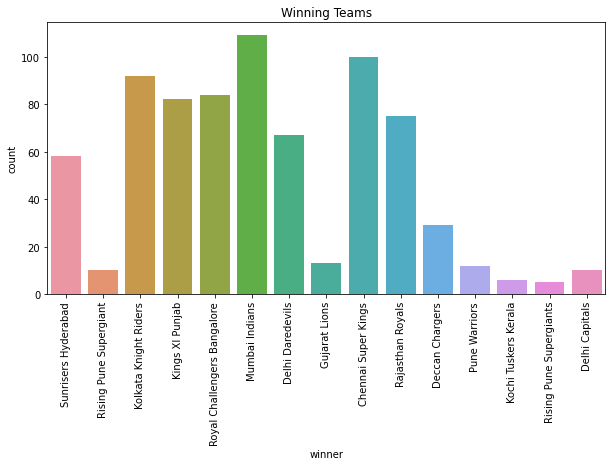

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = matches)
plt.title('Winning Teams')
plt.xticks(rotation = 90);

# Win by runs

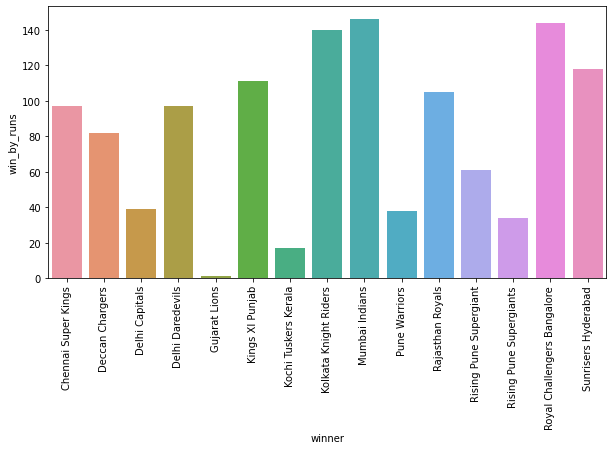

In [21]:
win_max=matches.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])

**The above graphs clearly shows Mumbai Indians is the team with most wins.**

# Man of the Match Winners

In [22]:
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: player_of_match, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

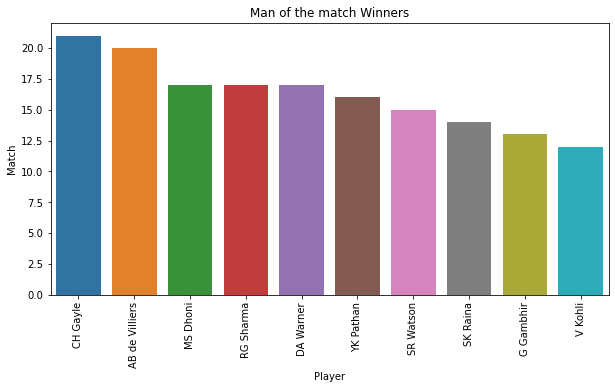

In [23]:
plt.figure(figsize = (10,5))
sns.barplot(x= matches.player_of_match.value_counts()[:10].index, y= matches.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 90)

**Chris Gayle and Ab de Villers are the best players**

# Number of matches in each season

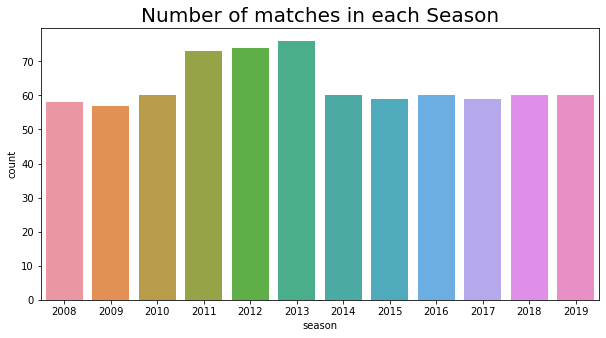

In [24]:
plt.subplots(figsize=(10,5))
sns.countplot(x = matches['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

# Toss winners

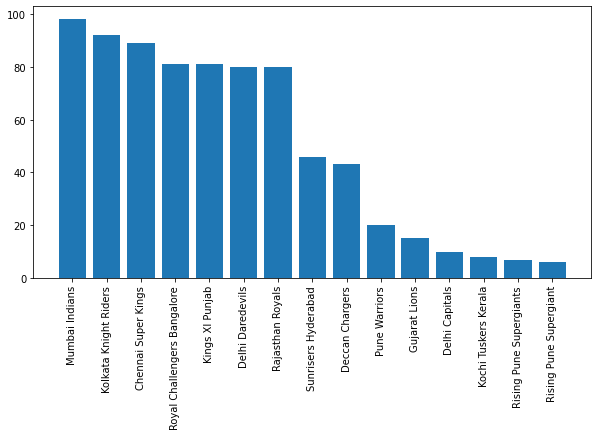

In [25]:
plt.figure(figsize=(10,5))
plt.bar(list(matches['toss_winner'].value_counts().keys()),list(matches['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()

# Comparing the Toss Decisions

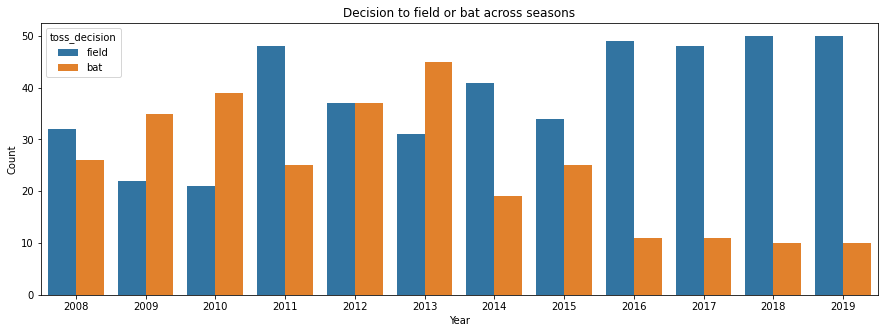

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(matches['season'].sort_values(), hue = matches['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# When a team wins after batting on first position

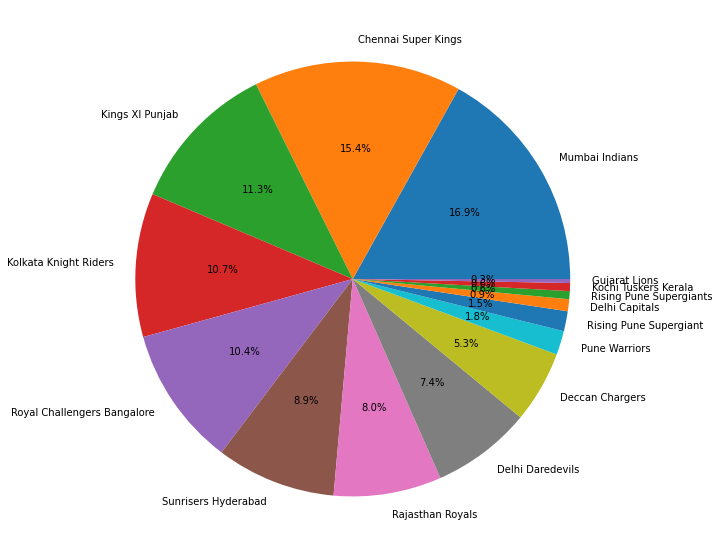

In [27]:
batting_first = matches[matches['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
plt.show()

# When a team wins after batting on second position

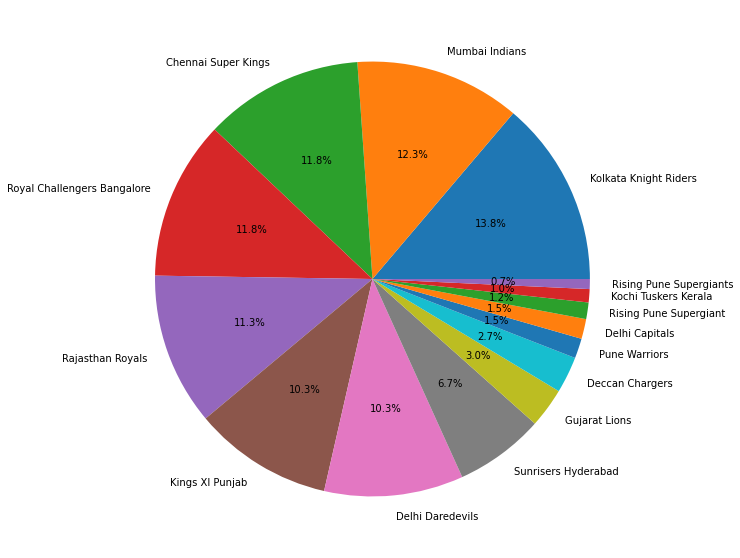

In [28]:
batting_second = matches[matches['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()

# Match Venues

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

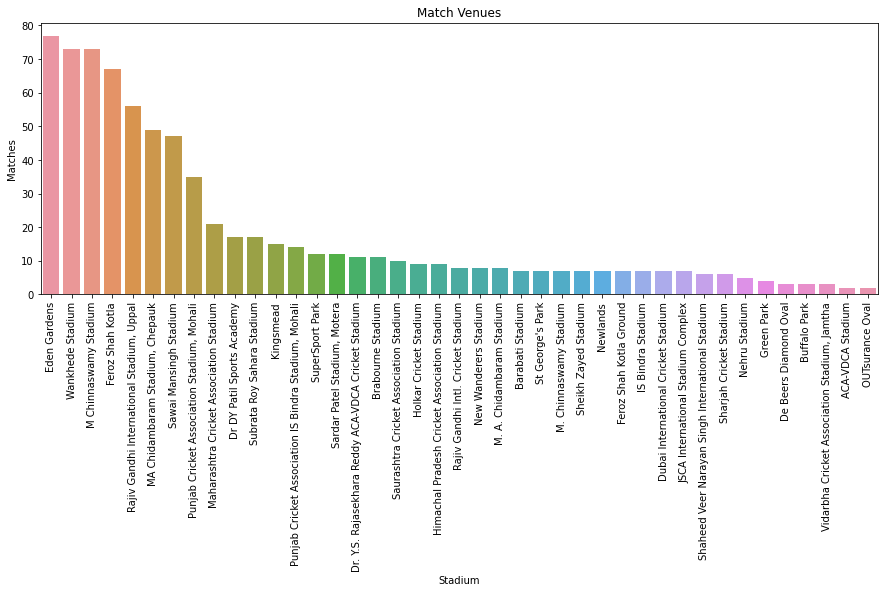

In [29]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches,order = matches['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

**Eden Garden is the most popular venue**

# Analysis of deliveries dataset

In [30]:
deliveries = pd.read_csv('deliveries.csv')
print("Data imported successfully")

Data imported successfully


In [31]:
print('The Total no of rows and columns in deliveries dataset is ', deliveries.shape)

The Total no of rows and columns in deliveries dataset is  (179078, 21)


In [32]:
# Total matches where Super over was and wasn't played
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [33]:
# total overall runs given by Extra
sum(deliveries['extra_runs'])

12004

In [34]:
# Total runs given by no balls
sum(deliveries['noball_runs'])

749

In [35]:
# Total runs given by penalty
sum(deliveries['penalty_runs'])

10

In [36]:
# Total soft-dissmisal of players over the years
sum(deliveries['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

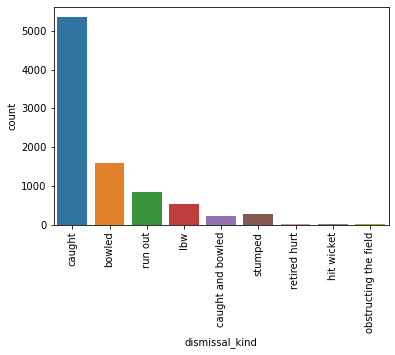

In [37]:
# kinds of dismissal
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)

**Conclusion:**

**1. Most successful Teams : Mumbai Indians and Chennai Super Kings**
    
**2. Best players to bid for: Chris Gayle and Ab de Villers.**
    
**3. There are many factors on which the win depends: winning a toss, opt field or bat etc.**
​